<a href="https://colab.research.google.com/github/phnx4um/Deep-Learning/blob/main/multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2. Multiclass Classification(using 1-of-M encoding):
Class 3: (12, 12), (11, 12), (12, 11), (11, 11), (12, 13), (13, 12), (13,13).


In [76]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline 

In [173]:
random.seed(10)
data = [[15, 10, 0], [13, 6, 0], [14,8, 0], [12, 9, 0], [10, 7, 0],  [12, 6, 0], [11, 8, 0], [13, 10, 0], [10, 6, 0], 
        [8, 12, 1],  [6, 11, 1], [8, 14,1], [9, 14, 1], [10, 15, 1], [9, 12, 1], [7, 10, 1], [8, 13, 1],
        [12, 12, 2], [11, 12, 2], [12, 11, 2], [11, 11, 2], [12, 13, 2], [13, 12, 2], [13,13, 2]]


random.shuffle(data)
print(data)
print(len(data))


# save some data for testing
test_samples_num = int(len(data) * 0.2)
rand_list = random.sample(range(len(data)), test_samples_num)
print(rand_list)

test_samples = []
for i in rand_list:
  test_samples.append(data[i])
  # remove from main list
  data.remove(data[i])


print(data)
print(len(data))
print(test_samples)
print(len(test_samples))

[[8, 13, 1], [12, 9, 0], [8, 12, 1], [12, 12, 2], [8, 14, 1], [13, 12, 2], [9, 14, 1], [12, 6, 0], [13, 10, 0], [10, 6, 0], [12, 11, 2], [14, 8, 0], [6, 11, 1], [10, 7, 0], [12, 13, 2], [11, 11, 2], [9, 12, 1], [11, 8, 0], [15, 10, 0], [13, 13, 2], [7, 10, 1], [10, 15, 1], [13, 6, 0], [11, 12, 2]]
24
[19, 11, 12, 13]
[[8, 13, 1], [12, 9, 0], [8, 12, 1], [12, 12, 2], [8, 14, 1], [13, 12, 2], [9, 14, 1], [12, 6, 0], [13, 10, 0], [10, 6, 0], [12, 11, 2], [6, 11, 1], [12, 13, 2], [9, 12, 1], [11, 8, 0], [15, 10, 0], [7, 10, 1], [10, 15, 1], [13, 6, 0], [11, 12, 2]]
20
[[13, 13, 2], [14, 8, 0], [10, 7, 0], [11, 11, 2]]
4


[[8, 13, 1], [12, 9, 0], [8, 12, 1], [12, 12, 2], [8, 14, 1], [13, 12, 2], [9, 14, 1], [12, 6, 0], [13, 10, 0], [10, 6, 0], [12, 11, 2], [6, 11, 1], [12, 13, 2], [9, 12, 1], [11, 8, 0], [15, 10, 0], [7, 10, 1], [10, 15, 1], [13, 6, 0], [11, 12, 2]]


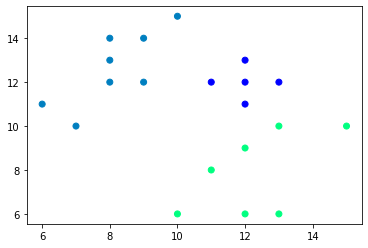

In [181]:
print(data)

x = [p[0] for p in data]
y = [p[1] for p in data]
l = [p[-1] for p in data]

plt.scatter(x,y,c=l, cmap=plt.cm.winter_r)
plt.show()

In [175]:
def format(data):
  input = [ point[0:2] for point in data ]

  res = [point[-1] for point in data]

  num_classes = 3

  # One hot encoding
  output = []
  for point in data:
    if (point[-1] == 0):
      # 1st class
      output.append([1,0,0])
    if (point[-1] == 1):
      # 2nd class
      output.append([0,1,0])
    if (point[-1] == 2):
      # 3rd class
      output.append([0,0,1])

  input = np.array(input).T
  output = np.array(output).T
  print(input)
  print(output)
  return input, output

In [176]:
input, output = format(data)
print(input.shape)
print(output.shape) # one hot encoded output

[[ 8 12  8 12  8 13  9 12 13 10 12  6 12  9 11 15  7 10 13 11]
 [13  9 12 12 14 12 14  6 10  6 11 11 13 12  8 10 10 15  6 12]]
[[0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0]
 [1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0]
 [0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1]]
(2, 20)
(3, 20)


In [177]:
X = input
y = output

W = np.array([1,1,1,1,1,1]).reshape(2,3)

a = 0.02
epochs = 10000

# training (vectorised implementation)
for i in range(epochs):
  Z = np.dot(W.T, X)
 
  t = np.exp(Z)
  A = t / t.sum(0) # softmax calculation

  # error calculation for this iteration
  l = np.multiply(np.log(A),y)
  l = -l.sum(0)
  l = 1/len(l) * l.sum()

  if (i % 500 == 0):
    print(f'Error = {l} (Epoch {i})')

  dz = A - y  #dz short for dL/dz(derivative loss wrt z)
  dw = 1/X.shape[1] * np.dot(X, dz.T)

  W = W - (a * dw) # updating weights

# final weights after training
print(W)




Error = 1.0986122886681098 (Epoch 0)
Error = 0.13649601897307626 (Epoch 500)
Error = 0.08630063820374369 (Epoch 1000)
Error = 0.06459378954018406 (Epoch 1500)
Error = 0.052096959110423294 (Epoch 2000)
Error = 0.04386089221430008 (Epoch 2500)
Error = 0.03797990431264374 (Epoch 3000)
Error = 0.033550042389400354 (Epoch 3500)
Error = 0.0300828251207249 (Epoch 4000)
Error = 0.027289413217473375 (Epoch 4500)
Error = 0.0249873155391269 (Epoch 5000)
Error = 0.0230552055472823 (Epoch 5500)
Error = 0.021409089037430874 (Epoch 6000)
Error = 0.01998886734871949 (Epoch 6500)
Error = 0.01875034424670042 (Epoch 7000)
Error = 0.017660256406227825 (Epoch 7500)
Error = 0.016693067166027264 (Epoch 8000)
Error = 0.015828831638275535 (Epoch 8500)
Error = 0.015051735993421633 (Epoch 9000)
Error = 0.014349074046727152 (Epoch 9500)
[[ 3.97780968 -2.0653954   1.08758572]
 [-2.16211835  3.88793799  1.27418036]]


#TESTING

In [178]:
# testing on test set
input, output = format(test_samples)

[[13 14 10 11]
 [13  8  7 11]]
[[0 1 1 0]
 [0 0 0 0]
 [1 0 0 1]]


In [179]:
acc = []
for i in range(input.shape[1]):
  print(f'TEST SAMPLE {i+1}: {input[:,i]}\n') 
  res = np.dot(W.T, input[:,i].reshape(2,1))
  t = np.exp(res)
  A = t / np.sum(t)

  print('Prediction')
  print(A)
  print('Target')
  print(output[:,i].reshape(3,1))
  
  print('\n============================\n')

  pred_col = np.argmax(A, 0)
  target_col = np.argmax(output[:,i].reshape(3,1), 0)

  if (pred_col[0] == target_col[0]):
    acc.append(1)

print(f'Correct Predictions: {sum(acc)} off {len(acc)}')



TEST SAMPLE 1: [13 13]

Prediction
[[8.24528205e-04]
 [9.01335705e-04]
 [9.98274136e-01]]
Target
[[0]
 [0]
 [1]]


TEST SAMPLE 2: [14  8]

Prediction
[[9.99997677e-01]
 [1.89068421e-16]
 [2.32277490e-06]]
Target
[[1]
 [0]
 [0]]


TEST SAMPLE 3: [10  7]

Prediction
[[9.92218134e-01]
 [1.39265506e-08]
 [7.78185239e-03]]
Target
[[1]
 [0]
 [0]]


TEST SAMPLE 4: [11 11]

Prediction
[[0.00244937]
 [0.00264109]
 [0.99490954]]
Target
[[0]
 [0]
 [1]]


Correct Predictions: 4 off 4
